# Checking the results of the models CNN

In [5]:
import keras
import numpy as np
import os
import sys
import tensorflow as tf
import pandas as pd

from datetime import datetime

sys.path.append('.')

from helpers import iou
from FrameLoader import FrameLoader
from DataGeneratorFrames import DataGeneratorFrames
from DataRepository import DataRepository

from models.GoogleNet import get_model as get_model_googlenet
from models.MobileNetV3Small import get_model as get_model_mobilenet
from models.RandomCNN import get_model as get_model_randomcnn
from models.vitransformer_enc import get_model as get_model_vit


###############################################################################

info_googlenet = {
    'name' : 'googlenet',
    'dim' : 512,
    'batch_size' : 8,
    'learning_rate' : 1e-4,
    'use_batch_norm' : True,
    'get_model_function' : get_model_googlenet,
}
info_vit = {
    'name' : 'vision_transformer',
    'dim' : 240,
    'patch_size' : 12, # (224 / 16) **2 = 196 patches
    'dim_embedding' : 128,
    'num_heads': 4,
    'encoder_blocks': 4,
    'mlp_head_units' : [2048, 1024, 256, 64],  # Size of the dense layers
    'batch_size' : 8,
    'min_epochs' : 15,
    'learning_rate' : 1e-4,
    'weight_decay' : 1e-4,
    'get_model_function' : get_model_vit,
}
info_vit['name'] = f"vision_transformer_d{info_vit['dim']}_p{info_vit['patch_size']}_e{info_vit['dim_embedding']}_nh{info_vit['num_heads']}"
info_mobilenet = {
    'name' : 'mobilenet',
    'dim' : 224, # pre-trained default
    'batch_size' : 32,
    'min_epochs' : 15,
    'has_frozen_layers' : True,
    'learning_rate' : 1e-3,
    'get_model_function' : get_model_mobilenet,
}

###############################################################################
selected_info = info_vit
###############################################################################

# trainings_info = {
#     'epochs' : 4, # Take more if first train round of random or transformer
#     'early_stopping' : False,
#     'early_stopping_patience' : 3,
#     'batch_size' : selected_info['batch_size'],
#     'learning_rate' : 8e-4 if 'learning_rate' not in selected_info.keys() else selected_info['learning_rate'],
#     'train_date' : datetime.now().strftime("%Y%m%d"),
# }
# trainings_info['weight_decay'] = trainings_info['learning_rate'] / 10 if 'weight_decay' not in selected_info.keys() else selected_info['weight_decay']

model = selected_info['get_model_function'](selected_info)
model.summary()

DIM = selected_info['dim']
weight_path = f"weights/{selected_info['name']}.weights.h5"

model.load_weights(weight_path)
repo = DataRepository()
val_generator = DataGeneratorFrames(
    frameloader=FrameLoader(repo),
    train_test_val="test",
    dim=(DIM,DIM),
    batch_size=8,
)

# optimizer = keras.optimizers.Adam(learning_rate=info_train['learning_rate'])
# model.compile(optimizer=optimizer, loss='mse', metrics=[iou])

# history = model.fit(
#     train_generator,
#     epochs=info_train['epochs'],
#     callbacks=callbacks,
#     verbose=1,
#     validation_data=val_generator
# )




Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 240, 240,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ patches_2 (Patches) │ (None, 400, 432)  │          0 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ patch_encoder_2     │ (None, 400, 128)  │    106,624 │ patches_2[0][0]   │
│ (PatchEncoder)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 400, 128)  │        256 │ patch_encoder_2[… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 400, 128)  │    263,808 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_16 (Add)        │ (None, 400, 128)  │          0 │ multi_head_atten… │
│                     │                   │            │ patch_encoder_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 400, 128)  │        256 │ add_16[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_29 (Dense)    │ (None, 400,       │  2,113,536 │ layer_normalizat… │
│                     │ 16384)            │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_35          │ (None, 400,       │          0 │ dense_29[0][0]    │
│ (Dropout)           │ 16384)            │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_30 (Dense)    │ (None, 400, 128)  │  2,097,280 │ dropout_35[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_36          │ (None, 400, 128)  │          0 │ dense_30[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_17 (Add)        │ (None, 400, 128)  │          0 │ dropout_36[0][0], │
│                     │                   │            │ add_16[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 400, 128)  │        256 │ add_17[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 400, 128)  │    263,808 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_18 (Add)        │ (None, 400, 128)  │          0 │ multi_head_atten… │
│                     │                   │            │ add_17[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 400, 128)  │        256 │ add_18[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_31 (Dense)    │ (None, 400,       │  2,113,536 │ layer_normalizat… │
│                     │ 16384)            │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 125,244,356 (477.77 MB)

 Trainable params: 125,244,356 (477.77 MB)

 Non-trainable params: 0 (0.00 B)

connection established, loading frame paths
rel paths of framelabels loaded
connection established, loading frame paths
rel paths of framelabels loaded
DataGeneratorSkillBorders init done


In [9]:
BATCH = 6
X, y = val_generator.__getitem__(BATCH)
X_int, y = val_generator.__getitem__(BATCH, normalize=False)
predictions = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


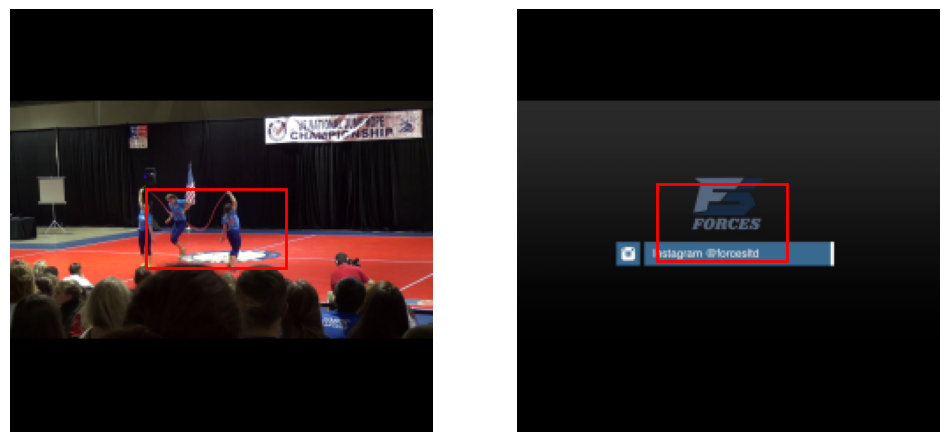

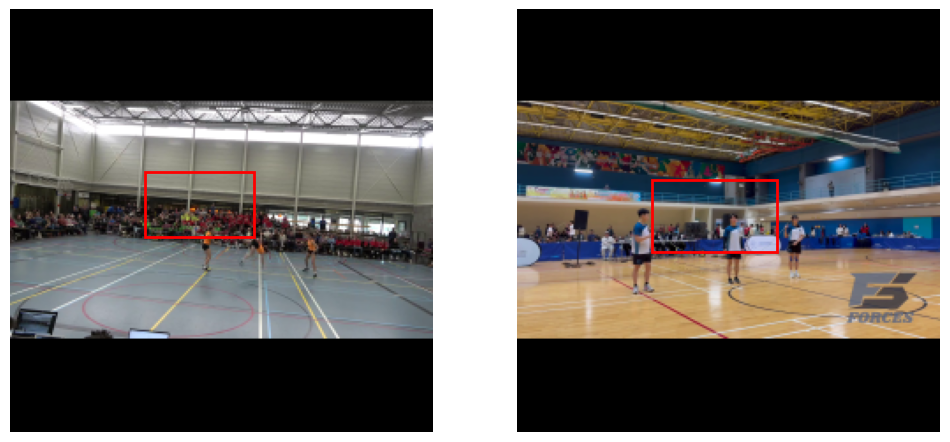

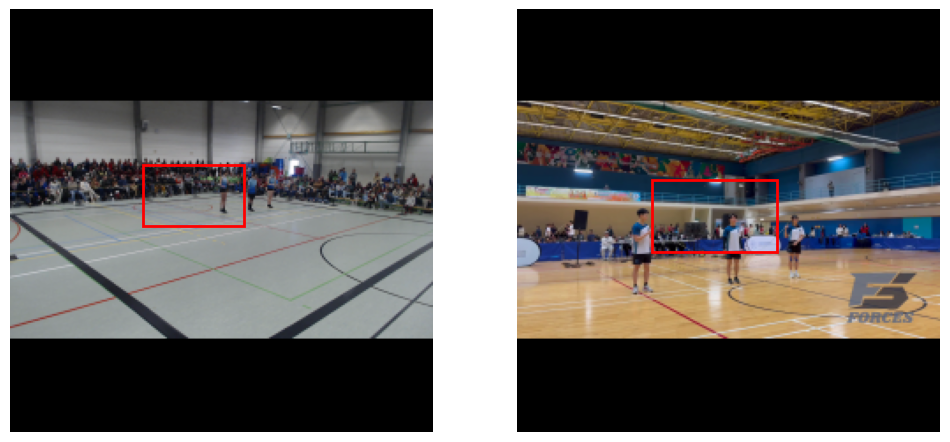

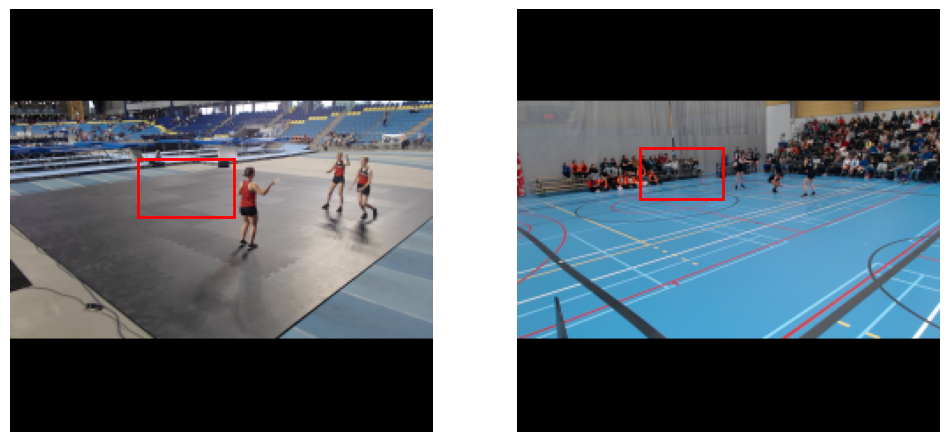

In [10]:
from helpers import plot
for j in range(len(X_int)//2):
    plot(X_int[j*2:j*2+2], predictions[j*2:j*2+2])

In [11]:
y

array([[0.42303   , 0.5225609 , 0.274631  , 0.22364438],
       [0.5       , 0.49791667, 1.        , 0.5625    ],
       [0.591797  , 0.57604176, 0.288281  , 0.14375025],
       [0.471094  , 0.5705731 , 0.420312  , 0.22656262],
       [0.562671  , 0.4310956 , 0.148878  , 0.12323532],
       [0.469531  , 0.5709635 , 0.41875   , 0.21953137],
       [0.701149  , 0.45492142, 0.341544  , 0.248661  ],
       [0.614395  , 0.39439923, 0.207444  , 0.11337637]], dtype=float32)

In [12]:
predictions

array([[0.4849966 , 0.5173136 , 0.32944587, 0.18647167],
       [0.48236513, 0.50248224, 0.30838862, 0.18292727],
       [0.44652802, 0.4598235 , 0.25878304, 0.15277685],
       [0.46429878, 0.48681915, 0.29562712, 0.16994502],
       [0.4321786 , 0.43853533, 0.2407783 , 0.14338104],
       [0.46440274, 0.48687977, 0.2956181 , 0.16985103],
       [0.4134305 , 0.42107868, 0.22685772, 0.13878839],
       [0.3864281 , 0.38684368, 0.19597775, 0.11967535]], dtype=float32)